In [3]:
from basicGP import BasicGP
from blackBoxFunction import BlackBoxFunction as BBF

import pandas as pd
import math
import numpy as np
from scipy import interpolate
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import random

%matplotlib inline  
%load_ext autoreload
%autoreload 2

np.random.seed(0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Plot the real function

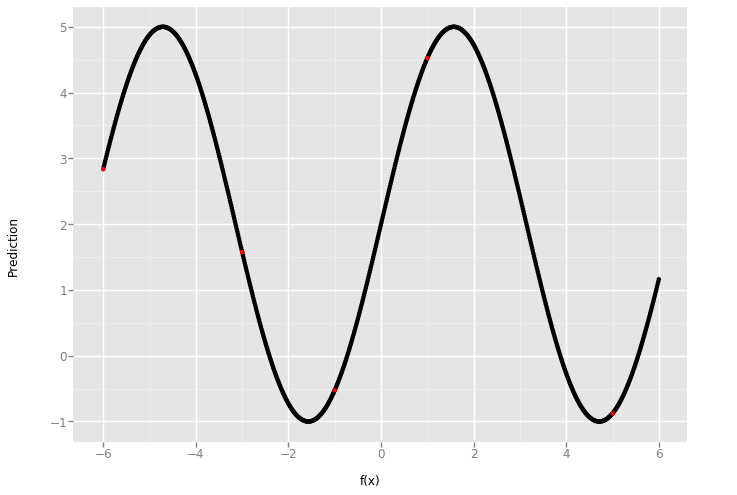

<ggplot: (-9223372036571858081)>


In [89]:
%reload_ext autoreload

n = 30
x = np.linspace(-6, 6, n*30)
X = np.random.randint(-6, 6, math.ceil(n/5))
y = BBF.eval(X)

real_vals = pd.DataFrame(np.vstack((x, BBF.eval(x))).T, columns=['f(x)', 'Prediction'])
sampled_vals = pd.DataFrame(np.vstack((X, BBF.eval(X))).T, columns=['f(x)', 'Prediction'])

p = ggplot(real_vals, aes(x='f(x)', y='Prediction'))
p += geom_point()
p += geom_point(aes(x='f(x)', y='Prediction'), data=sampled_vals, color='red')
#stat_smooth(colour='blue', span=0.2)

print(p)

## Show points that are sampled

In [90]:
%reload_ext autoreload

# Test data
n = 50
Xtest = np.linspace(-5, 5, n).reshape(-1,1)

GP = BasicGP(kernel_param=0.1)



In [91]:
%reload_ext autoreload

# Noiseless training data
Xtrain = np.array([-4, -3, -2, -1, 1]).reshape(5,1)
ytrain = BBF.eval(Xtrain)

GP.set_datapoints(Xtrain)

# Apply the kernel function to our training points
K = kernel(Xtrain, Xtrain, param)
L = np.linalg.cholesky(K + 0.00005*np.eye(len(Xtrain))) # this is the data we have from the previous results

# Compute the mean at our test points.
K_s = kernel(Xtrain, Xtest, param)
Lk = np.linalg.solve(L, K_s)

mu = np.dot(Lk.T, np.linalg.solve(L, (ytrain))).reshape((n,))

# Compute the standard deviation so we can plot it
s2 = np.diag(K_ss) - np.sum(Lk**2, axis=0)
stdv = np.sqrt(s2)

AttributeError: 'BasicGP' object has no attribute 'set_datapoints'

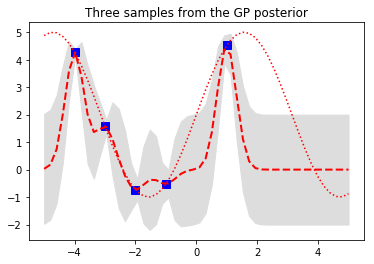

In [84]:
plt.plot(Xtrain, ytrain, 'bs', ms=8)
plt.plot(Xtest, BBF.eval(Xtest), 'r:', label=u'$f(x) = x\,\sin(x)$')

plt.gca().fill_between(Xtest.flat, mu-2*stdv, mu+2*stdv, color="#dddddd")
plt.plot(Xtest, mu, 'r--', lw=2)
#plt.axis([-5, 5, -3, 3])
plt.title('Three samples from the GP posterior')
plt.show()